In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
# import plotly.express as pltly
# import plotly
import pandas as pd
from functools import partial
import networkx as net
# import plotly.graph_objects as go

In [4]:
np.set_printoptions(suppress = True)

**Comparison of the optimality gap $F({\bar{\theta}}^{(t)}) - F^\ast$ between digital and analog schemes with varying channel uses $N$**

In [12]:
opt = 0.41
losseses = pickle.load( open('../repo_jv/data/simulations/losseses_SCHEME_1_a_200.00_zeta0_0.0005_2-D_torus.pkl', 'rb') )
losseses = np.array(losseses) - opt
K = losseses.shape[2]
df1 = pd.DataFrame(losseses[0], columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/simulations/losseses_SCHEME_2_P_0.000020mW_N_20000_a_200.00_zeta0_0.0005_a_prime_200.00_chain.pkl', 'rb') )
losseses = np.array(losseses) - opt
df2 = pd.DataFrame(losseses[0], columns = ['Device_{}'.format(i + 1) for i in range(K)] )

# losseses = pickle.load( open('../repo_jv/data/simulations/losseses_SCHEME_3_P_0.000020mW_N_20000_a_200.00_zeta0_0.0005_a_prime_200.00_chain.pkl', 'rb') )
# losseses = np.array(losseses) - opt
# df3 = pd.DataFrame(losseses[0], columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/simulations/losseses_SCHEME_2_P_0.000020mW_N_1000_a_200.00_zeta0_0.0005_a_prime_200.00_chain.pkl', 'rb') )
losseses = np.array(losseses) - opt
df4 = pd.DataFrame(losseses[0], columns = ['Device_{}'.format(i + 1) for i in range(K)] )

# losseses = pickle.load( open('../repo_jv/data/simulations/losseses_SCHEME_3_P_0.000020mW_N_1000_a_200.00_zeta0_0.0005_a_prime_200.00_chain.pkl', 'rb') )
# losseses = np.array(losseses) - opt
# df5 = pd.DataFrame(losseses[0], columns = ['Device_{}'.format(i + 1) for i in range(K)] )

# losseses = pickle.load( open('../repo_jv/data/simulations/losseses_SCHEME_4_P_0.000200mW_N_1000_a_200.00_zeta0_0.0005_a_prime_1000.00_chain_equal_n-1.pkl', 'rb') )
# losseses = np.array(losseses[1]) - opt
# df6 = pd.DataFrame(losseses, columns = ['Device_{}'.format(i + 1) for i in range(K)] )

# losseses = pickle.load( open('../repo_jv/data/losseses_SCHEME_1_eta0_2.00_zeta0_1.00_10-0.pkl', 'rb') )
# losseses = np.array(losseses) - opt
# df7 = pd.DataFrame(losseses[0], columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/simulations/losseses_local_a_200.00.pkl', 'rb') )
losseses = np.array(losseses) - opt
df8 = pd.DataFrame(losseses[0], columns = ['Device_{}'.format(i + 1) for i in range(K)] )

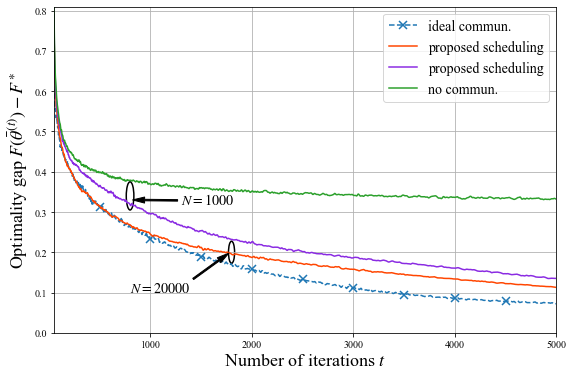

In [10]:
plt.rc('font', family='Times New Roman')
mpl.rcParams["mathtext.fontset"] = 'stix'
fig, ax = plt.subplots(figsize = (9.0,6.0))
df1.rolling(window = 20).mean().mean(axis = 1).plot(style = '--', marker = 'x', fillstyle = 'none', ms = 8, mew = 1.5, markevery = 500, label = r'ideal commun.')
df2.rolling(window = 49).mean().mean(axis = 1).plot(color = 'orangered', label = r'proposed scheduling')
# df3.rolling(window = 49).mean().mean(axis = 1).plot(style = '--', color = 'orangered', label = r'TDMA')
df4.rolling(window = 49).mean().mean(axis = 1).plot(color = 'blueviolet', label = r'proposed scheduling')
# df5.rolling(window = 49).mean().mean(axis = 1).plot(style = '--', color = 'blueviolet', label = r'TDMA')
# df6.rolling(window = 49).mean().mean(axis = 1).plot(color = 'tab:blue', label = r'analog')
# df7.rolling(window = 10).mean().mean(axis = 1).plot(style = '--', color = 'blueviolet', label = 'Ideal commun.')
df8.rolling(window = 49).mean().mean(axis = 1).plot(color = 'tab:green', label = 'no commun.')

plt.xlabel(r'Number of iterations $t$', fontsize = 18)
plt.ylabel(r'Optimality gap $F(\bar{\theta}^{(t)})-F^\ast$', fontsize = 18)
# plt.title(r'ER graph with $p = 0.2$ and $\barP = -57$dBm', fontsize = 14)
plt.xlim((51, 5000))
plt.ylim((0, 0.81))
plt.grid()

# Place legend for individual curves
plt.legend(loc = 'upper right', fontsize = 14)
# Place marks using annotation
from matplotlib.patches import Ellipse
el = Ellipse((800, 0.34), 75, 0.070, angle = 0, fill = False, lw = 1.5)
ax.add_artist(el)
el = Ellipse((1800, 0.20), 60, 0.055, angle = 0, fill = False, lw = 1.5)
ax.add_artist(el)
_ = ax.annotate(r'$N = 1000$',
            xy = (810, .33), xycoords = 'data',
            xytext = (50, -5), textcoords = 'offset points', fontsize = 14,
            arrowprops=dict(facecolor = 'black', width = 1.5, headwidth = 6, shrink = 0.03))
_ = ax.annotate(r'$N = 20000$',
            xy = (1785, .2), xycoords = 'data',
            xytext = (-100, -40), textcoords = 'offset points', fontsize = 14,
            arrowprops=dict(facecolor = 'black', width = 1.5, headwidth = 6, shrink = 0.03))

# _ = plt.savefig('C:/Users/Helen/Documents/visiting_research@KCL/D2D_DSGD/XXX20-FL_over_D2D/eps/dig_scheduling-vs_TDMA.eps',format='eps', dpi=600)
plt.show()

In [15]:
df4.rolling(window = 49).mean().mean(axis = 1)[2000] + opt

0.6359547085908004